## imports

In [170]:
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport

df = pd.read_csv("insurance.csv")
profile = ProfileReport(df, title="My Data Report")

# Save as HTML file to view in browser
profile.to_file("insurance_repport3.html")
print("Report saved as insurance_repport.html - open it in your browser")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 74.59it/s]

Report saved as insurance_repport.html - open it in your browser


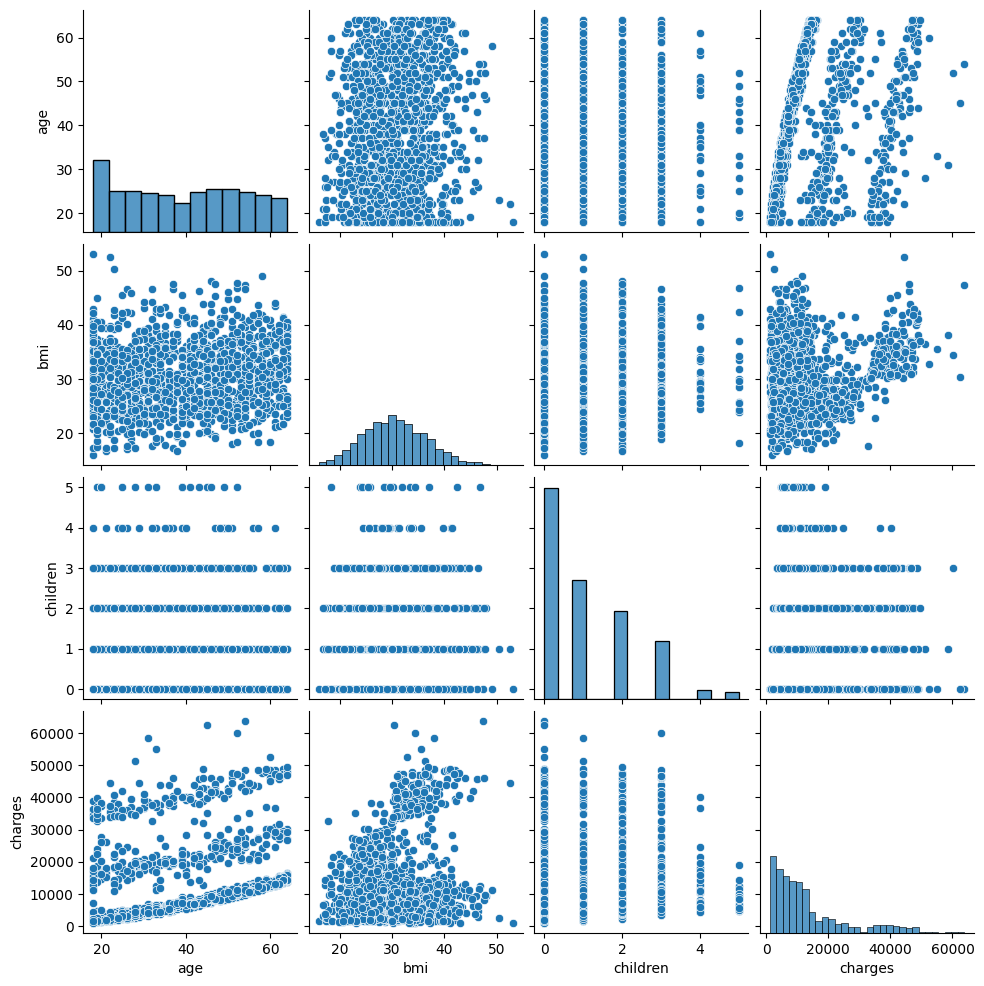

In [171]:
import seaborn as sns
sns.pairplot(df)

In [172]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [173]:
 df["sex"]=df["sex"].map({"male":0,"female":1})
 df["smoker"]=df["smoker"].map({"yes":1,"no":0})
 df["region"]=df["region"].map({"southeast":0,"southwest":1,"northeast":2,"northwest":3})
 df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,0,1725.55230
2,28,0,33.000,3,0,0,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520


In [174]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

In [175]:
df = df.fillna(0)

target_name = "charges"

x = df.drop(columns=target_name)
y = df[target_name]
x.head()

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,1,1
1,18,0,33.770,1,0,0
2,28,0,33.000,3,0,0
3,33,0,22.705,0,0,3
4,32,0,28.880,0,0,3


In [176]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

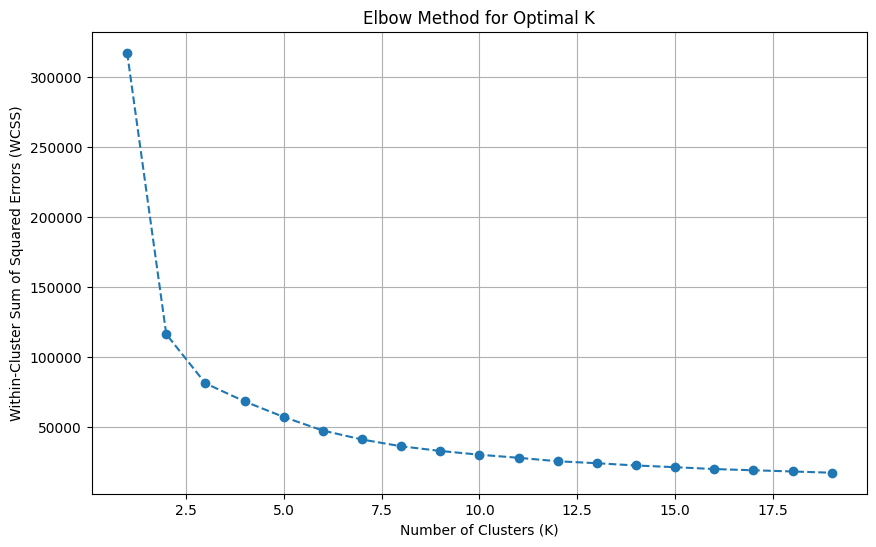

In [177]:
%matplotlib inline
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, n_init=10, random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

# Plot the elbow method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 20), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squared Errors (WCSS)')
plt.grid(True)
plt.show()

In [178]:
n_clusters = 20
kmeans = KMeans(n_clusters=n_clusters, n_init=20, random_state=42)
clusters = kmeans.fit_predict(x)

clusters

array([ 9,  1, 18, ...,  1,  9,  5], shape=(1337,), dtype=int32)

In [179]:
centroids = kmeans.cluster_centers_

centroids

array([[54.16470588,  0.47058824, 32.14005882,  1.03529412,  0.15294118,
         1.62352941],
       [19.75324675,  0.50649351, 36.32435065,  0.53246753,  0.19480519,
         1.01298701],
       [39.51086957,  0.48913043, 30.86570652,  1.63043478,  0.17391304,
         1.60869565],
       [27.02666667,  0.57333333, 23.58626667,  1.24      ,  0.18666667,
         1.8       ],
       [52.53448276,  0.51724138, 40.6662069 ,  1.36206897,  0.15517241,
         1.        ],
       [60.94444444,  0.51851852, 32.0512963 ,  1.03703704,  0.22222222,
         1.57407407],
       [36.53333333,  0.43333333, 41.74016667,  1.33333333,  0.2       ,
         0.8       ],
       [33.        ,  0.51190476, 28.13345238,  1.1547619 ,  0.22619048,
         1.4047619 ],
       [45.01428571,  0.47142857, 36.77642857,  1.25714286,  0.22857143,
         1.15714286],
       [19.74468085,  0.5212766 , 29.31851064,  0.61702128,  0.24468085,
         1.65957447],
       [52.44776119,  0.52238806, 24.24567164,  1.

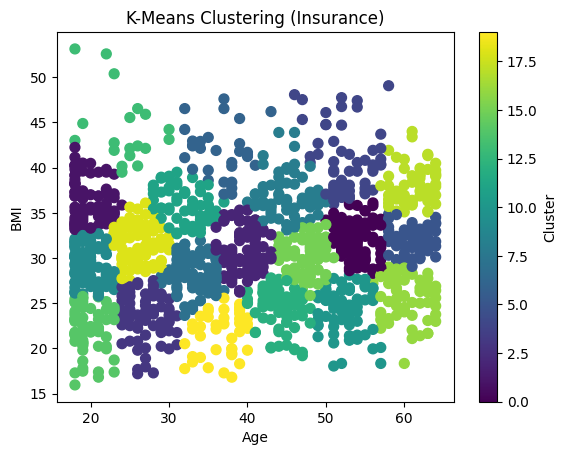

In [180]:
x["Cluster"] = clusters

fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(x['age'], x["bmi"], c=x['Cluster'], s=50, cmap='viridis')
ax.set_title("K-Means Clustering (Insurance)")
ax.set_xlabel("Age")
ax.set_ylabel("BMI")
plt.colorbar(scatter, label='Cluster')
plt.show()

In [181]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(x, clusters)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.48846053290827257
